# LOGISTIC with Chat GPT

In [1]:
# Import the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/Users/paoloartasensi/Python_Scripts/artabax/artbax_csv/squat_20221219_0413PM.csv', header=0)

df.head()


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN,prob
0,1671462680372,9.1154,1.6861,4.4428,0.21,2.17,-0.63,1.0,0.0,0.0,0,0,0
1,1671462680502,9.0436,1.6693,4.3541,1.47,2.59,-0.28,1.0,0.0,0.0,0,0,0
2,1671462680633,9.0125,1.6837,4.3062,0.56,-2.17,0.98,1.0,0.0,0.0,0,0,0
3,1671462680761,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,1.0,0.0,0.0,0,0,0
4,1671462680897,9.0891,1.6358,4.4547,3.78,-3.01,0.77,1.0,0.0,0.0,0,0,0


In [2]:

count = df['DOWN'].value_counts()[1]
print(count)
shift = 3

df = df.drop(columns=['P','R','prob'])
df

24


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,UP,DOWN
0,1671462680372,9.1154,1.6861,4.4428,0.21,2.17,-0.63,1.0,0,0
1,1671462680502,9.0436,1.6693,4.3541,1.47,2.59,-0.28,1.0,0,0
2,1671462680633,9.0125,1.6837,4.3062,0.56,-2.17,0.98,1.0,0,0
3,1671462680761,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,1.0,0,0
4,1671462680897,9.0891,1.6358,4.4547,3.78,-3.01,0.77,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...
1036,1671462796607,9.5753,1.6741,3.6764,2.80,-8.12,0.98,1.0,0,0
1037,1671462796721,9.3765,1.6813,3.4776,5.39,-2.66,1.19,1.0,0,0
1038,1671462796833,9.0771,1.8226,3.1782,2.38,0.91,0.70,1.0,0,0
1039,1671462796947,7.1276,1.2263,2.6872,5.32,-6.65,1.68,1.0,0,0


In [3]:

df_temp = df.loc[df['DOWN'] == 1]
pos = np.array(df_temp.index)

df_temp.head(24)


,Time,Ax,Ay,Az,Gx,Gy,Gz,BAR,UP,DOWN
48,1671462686073,9.2879,1.5927,3.9111,2.24,-4.27,1.05,1.0000,0,1
81,1671462689804,9.5561,1.6765,3.4871,-2.73,2.80,1.19,1.0000,0,1
115,1671462693579,9.4819,1.7148,3.4871,-1.40,-0.70,0.70,1.0000,0,1
155,1671462698057,10.3345,2.0214,3.6524,1.82,-2.52,0.28,1.0000,0,1
188,1671462701780,9.1418,2.1220,4.3877,-7.42,-7.98,1.75,1.0000,0,1
228,1671462706274,11.2734,1.6047,4.4428,2.17,5.25,1.40,1.0000,0,1
262,1671462710099,11.3739,2.0406,4.3039,-1.96,8.68,-1.33,1.0000,0,1
295,1671462713800,11.3644,1.9112,3.8512,-1.19,4.62,-0.77,0.9999,0,1
329,1671462717583,11.8410,1.8633,4.1601,0.42,4.27,-2.24,1.0000,0,1
363,1671462721259,9.0220,1.3292,2.9986,0.21,7.98,0.14,1.0000,0,1


In [4]:
#Aggiunge numeri 1 a quelli presenti nella colonna DOWN
#for i in pos:
    #for k in range(-shift+1, shift, 1):
        #df.at[i+k, 'DOWN'] = 1

#df.dropna(inplace=True)


In [5]:
count = df['DOWN'].value_counts()[1]
print(count)

24


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the columns containing the accelerometer and gyroscope data
X = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'BAR']]

# Select the column containing the labels (0 for non-squat, 1 for squat)
y = df['DOWN']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


from sklearn.metrics import accuracy_score, precision_score, recall_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 100.00%
Accuracy: 1.0
Precision: 0.0
Recall: 0.0


/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


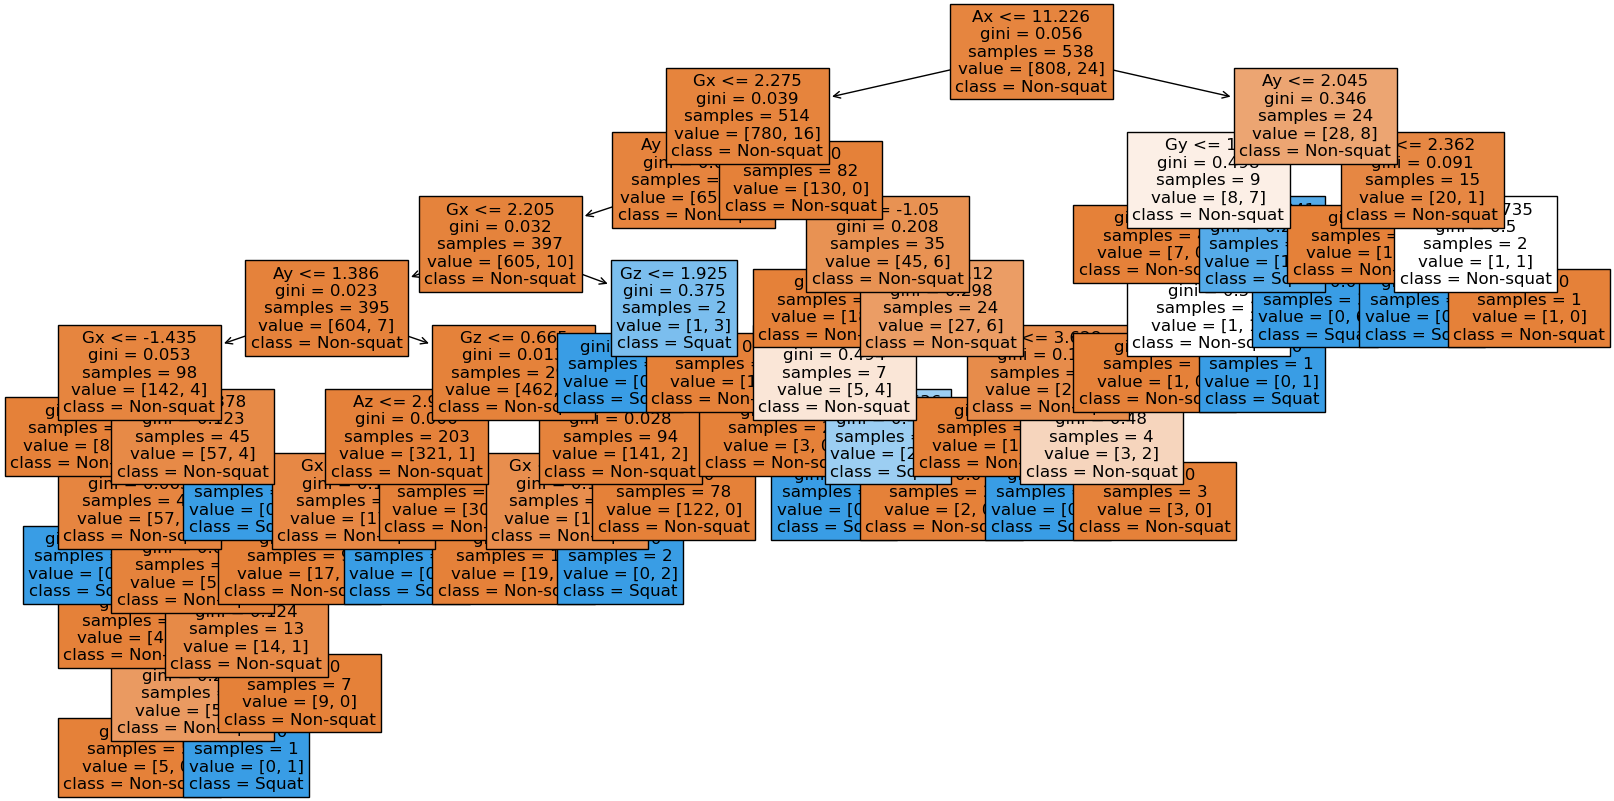

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree in the random forest
tree = model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Non-squat', 'Squat'], filled=True, fontsize=12)
plt.show()

# LOGISTIC REGRESSION

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 96.17%
Accuracy: 0.9617224880382775
Precision: 0.0
Recall: 0.0


> PESI

In [9]:
# Print the weights (coefficients) for each feature with their corresponding labels (feature names)
for feature, coef in zip(X.columns, model.coef_[0]):
    print('{}: {}'.format(feature, coef))

Ax: 0.13948570824141177
Ay: 1.0304920691340802
Az: -0.363599284139221
Gx: -0.01914744736916372
Gy: 0.011832829342868894
Gz: -0.006599303207462723
BAR: -0.0002917784051743396


> termine noto B0 intercetta

In [10]:
print(model.intercept_)

[-5.6167066]


/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 500x500 with 0 Axes>

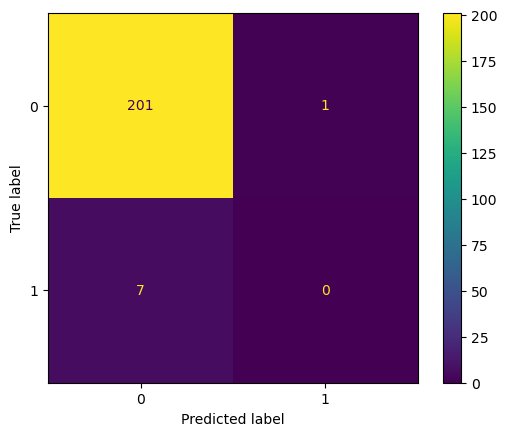

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
plot_confusion_matrix(model, X_test, y_test,  labels=[0, 1])
plt.show()

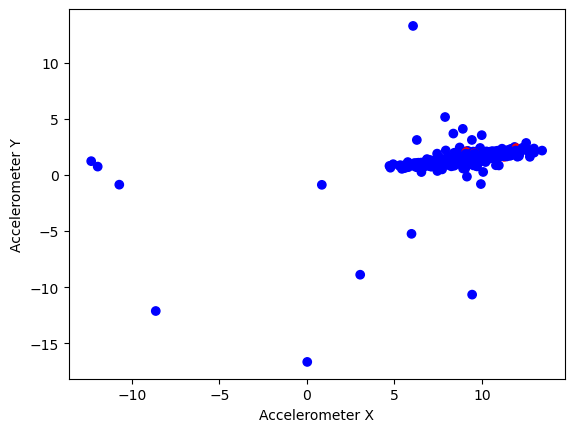

In [12]:
# Create a scatter plot of the data points
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(X['Ax'], X['Ay'], c=colors)
plt.xlabel('Accelerometer X')
plt.ylabel('Accelerometer Y')
plt.show()